In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
currency_codes = [
    'USD', 'EUR', 'JPY', 'GBP', 'AUD', 'CAD', 'CHF', 'CNY', 'SEK', 'NZD',
    'NOK',  # Norwegian Krone (Norway)
    'DKK',  # Danish Krone (Denmark)
    'PLN',  # Polish Zloty (Poland)
    'HUF',  # Hungarian Forint (Hungary)
    'CZK',  # Czech Koruna (Czech Republic)
    'RON',  # Romanian Leu (Romania)
    'TRY',  # Turkish Lira (Turkey)
    'AED',  # United Arab Emirates Dirham (UAE)
    'SAR',  # Saudi Riyal (Saudi Arabia)
    'ZAR',  # South African Rand (South Africa)
    'NGN',  # Nigerian Naira (Nigeria)
    'KES',  # Kenyan Shilling (Kenya)
    'EGP',  # Egyptian Pound (Egypt)
    'MXN',  # Mexican Peso (Mexico)
    'BRL',  # Brazilian Real (Brazil)
    'ARS',  # Argentine Peso (Argentina)
    'CLP'   # Chilean Peso (Chile)
]

In [3]:
exch = []
for x in currency_codes:
    if not x == "USD":
        var = x + '=X'
        exch.append(var)

exch

['EUR=X',
 'JPY=X',
 'GBP=X',
 'AUD=X',
 'CAD=X',
 'CHF=X',
 'CNY=X',
 'SEK=X',
 'NZD=X',
 'NOK=X',
 'DKK=X',
 'PLN=X',
 'HUF=X',
 'CZK=X',
 'RON=X',
 'TRY=X',
 'AED=X',
 'SAR=X',
 'ZAR=X',
 'NGN=X',
 'KES=X',
 'EGP=X',
 'MXN=X',
 'BRL=X',
 'ARS=X',
 'CLP=X']

In [4]:
historical_data = yf.download(exch, start="2013-01-01", end="2023-11-10")

[*********************100%%**********************]  26 of 26 completed


In [5]:
closing_prices = historical_data['Close']

In [6]:
sust_targets = ['SAR', 'DE', 'IBDRY' ]

In [7]:
sust_data = yf.download(sust_targets, start="2013-01-01", end="2023-11-10")

[*********************100%%**********************]  3 of 3 completed


In [8]:
sust_data = sust_data['Close']

In [9]:
data_prov =['^GSPC', '^DJI', 'GC=F', 'WTI', 'BTC-USD']

In [10]:
more_data = yf.download(data_prov, start="2013-01-01", end="2023-11-10")

[*********************100%%**********************]  5 of 5 completed


In [11]:
more_data = more_data['Close']

In [12]:
merged_df = pd.merge(closing_prices, more_data, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, sust_data, left_index=True, right_index=True)

In [14]:
merged_df

,AED=X,ARS=X,AUD=X,BRL=X,CAD=X,CHF=X,CLP=X,CNY=X,CZK=X,DKK=X,...,TRY=X,ZAR=X,BTC-USD,GC=F,WTI,^DJI,^GSPC,DE,IBDRY,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,3.67200,4.912900,0.962310,2.0456,0.99390,0.91550,479.200012,6.2376,18.983000,5.65220,...,1.781400,8.449700,NaN,1687.900024,16.980000,13412.549805,1462.420044,87.989998,21.660000,15.500000
2013-01-03,3.67200,4.920800,0.953020,2.0456,0.98560,0.91778,474.149994,6.2332,19.091600,5.65863,...,1.777780,8.478100,NaN,1673.699951,17.100000,13391.360352,1459.369995,87.769997,21.420000,15.450000
2013-01-04,3.67200,4.920000,0.956660,2.0487,0.98840,0.92800,472.549988,6.2325,19.368999,5.72710,...,1.784200,8.587700,NaN,1648.099976,17.330000,13435.209961,1466.469971,88.669998,21.620001,15.300000
2013-01-07,3.67210,4.924200,0.952800,2.0324,0.98599,0.92453,472.450012,6.2305,19.403601,5.70730,...,1.780480,8.555400,NaN,1645.500000,17.280001,13384.290039,1461.890015,88.599998,21.540001,15.200000
2013-01-08,3.67210,4.926400,0.951320,2.0264,0.98560,0.92090,470.950012,6.2298,19.446699,5.68370,...,1.779180,8.560500,NaN,1661.500000,17.129999,13328.849609,1457.150024,87.680000,21.299999,15.390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,3.67200,350.043396,1.555718,4.9529,1.37470,0.90610,886.659973,7.3141,23.019899,7.03012,...,28.358900,18.402100,34732.324219,1991.500000,4.220000,34061.320312,4358.339844,382.200012,45.680000,24.840000
2023-11-06,3.67257,347.234161,1.534480,4.8992,1.36606,0.89921,869.613403,7.2985,22.673201,6.95236,...,28.383150,18.262899,35037.371094,1981.599976,4.010000,34095.859375,4365.979980,378.250000,45.299999,24.770000
2023-11-07,3.67200,350.019135,1.540970,4.8841,1.36973,0.89920,881.299988,7.2686,22.877899,6.95824,...,28.447599,18.290100,35443.562500,1966.800049,3.810000,34152.601562,4378.379883,369.239990,44.770000,24.430000


In [16]:
merged_df_corr = merged_df.corr()
merged_df.columns


Index(['AED=X', 'ARS=X', 'AUD=X', 'BRL=X', 'CAD=X', 'CHF=X', 'CLP=X', 'CNY=X',
       'CZK=X', 'DKK=X', 'EGP=X', 'EUR=X', 'GBP=X', 'HUF=X', 'JPY=X', 'KES=X',
       'MXN=X', 'NGN=X', 'NOK=X', 'NZD=X', 'PLN=X', 'RON=X', 'SAR=X', 'SEK=X',
       'TRY=X', 'ZAR=X', 'BTC-USD', 'GC=F', 'WTI', '^DJI', '^GSPC', 'DE',
       'IBDRY', 'SAR'],
      dtype='object')

In [17]:
df_filled = merged_df.interpolate()
df_filled.apply(pd.isnull).sum()

AED=X        0
ARS=X        0
AUD=X        0
BRL=X        0
CAD=X        0
CHF=X        0
CLP=X        0
CNY=X        0
CZK=X        0
DKK=X        0
EGP=X        0
EUR=X        0
GBP=X        0
HUF=X        0
JPY=X        0
KES=X        0
MXN=X        0
NGN=X        0
NOK=X        0
NZD=X        0
PLN=X        0
RON=X        0
SAR=X        0
SEK=X        0
TRY=X        0
ZAR=X        0
BTC-USD    430
GC=F         0
WTI          0
^DJI         0
^GSPC        0
DE           0
IBDRY        0
SAR          0
dtype: int64

In [18]:
sust_energy = df_filled['IBDRY']

In [22]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()

    X = []
    y = []

    for i in range(len(df_as_np) - window_size ):
        row = [[a] for a in df_as_np[i:i+5]]

        X.append(row)
        label = df_as_np[i+5]
        y.append(label)

    return np.array(X), np.array(y)

In [23]:
WINDOW_SIZE = 5

X, y = df_to_X_y(sust_energy, WINDOW_SIZE)

X.shape, y.shape

((2728, 5, 1), (2728,))

In [24]:
len(sust_energy)

2733

In [25]:
X_train, y_train = X[:2186], y[:2186]
X_val, y_val = X[2186:2500], y[2186:2500]
X_test, y_test = X[2500:], y[2500:]

In [21]:
from sklearn.metrics import mean_squared_error as mse 

def plot_preedicitons1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()

    df = pd.DataFrame(data={'Predictions': predictions, 'Actual':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actual'][start:end])

    return df, mse(y, predictions)


In [26]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

8/8 [==============================] - 4s 2ms/step


(     Predictions     Actual
 0      46.375206  46.990002
 1      46.629337  46.270000
 2      46.471649  45.529999
 3      46.041733  45.610001
 4      45.823151  46.020000
 ..           ...        ...
 223    45.060513  45.680000
 224    45.346184  45.299999
 225    45.376030  44.770000
 226    45.148392  44.980000
 227    45.029510  45.250000
 
 [228 rows x 2 columns],
 0.48596421585311317)

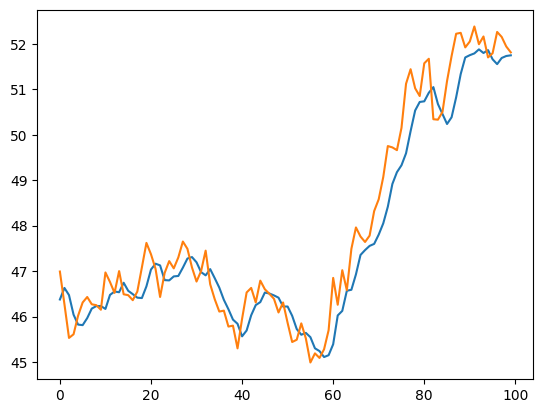

In [27]:
plot_preedicitons1(model1, X_test, y_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * #Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [29]:
model2 = Sequential()

model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 8)                 2056      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [30]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [32]:
model2.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=[cp2])

Epoch 1/20
58/69 [========================>.....] - ETA: 0s - loss: 0.4149 - root_mean_squared_error: 0.6442

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 13ms/step - loss: 0.4395 - root_mean_squared_error: 0.6630 - val_loss: 1.1600 - val_root_mean_squared_error: 1.0770
Epoch 2/20
66/69 [===========================>..] - ETA: 0s - loss: 0.4430 - root_mean_squared_error: 0.6656

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 10ms/step - loss: 0.4395 - root_mean_squared_error: 0.6629 - val_loss: 1.1595 - val_root_mean_squared_error: 1.0768
Epoch 3/20
68/69 [============================>.] - ETA: 0s - loss: 0.4323 - root_mean_squared_error: 0.6575

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 12ms/step - loss: 0.4389 - root_mean_squared_error: 0.6625 - val_loss: 1.1588 - val_root_mean_squared_error: 1.0765
Epoch 4/20
57/69 [=======================>......] - ETA: 0s - loss: 0.3938 - root_mean_squared_error: 0.6275

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 12ms/step - loss: 0.4388 - root_mean_squared_error: 0.6624 - val_loss: 1.1588 - val_root_mean_squared_error: 1.0765
Epoch 5/20
64/69 [==========================>...] - ETA: 0s - loss: 0.4395 - root_mean_squared_error: 0.6629

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 11ms/step - loss: 0.4389 - root_mean_squared_error: 0.6625 - val_loss: 1.1584 - val_root_mean_squared_error: 1.0763
Epoch 6/20
52/69 [=====================>........] - ETA: 0s - loss: 0.4345 - root_mean_squared_error: 0.6592

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 10ms/step - loss: 0.4387 - root_mean_squared_error: 0.6623 - val_loss: 1.1577 - val_root_mean_squared_error: 1.0760
Epoch 7/20
65/69 [===========================>..] - ETA: 0s - loss: 0.4310 - root_mean_squared_error: 0.6565

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 12ms/step - loss: 0.4392 - root_mean_squared_error: 0.6627 - val_loss: 1.1569 - val_root_mean_squared_error: 1.0756
Epoch 8/20
69/69 [==============================] - 0s 4ms/step - loss: 0.4387 - root_mean_squared_error: 0.6624 - val_loss: 1.1573 - val_root_mean_squared_error: 1.0758
Epoch 9/20
69/69 [==============================] - 0s 4ms/step - loss: 0.4385 - root_mean_squared_error: 0.6622 - val_loss: 1.1573 - val_root_mean_squared_error: 1.0758
Epoch 10/20
55/69 [======================>.......] - ETA: 0s - loss: 0.4585 - root_mean_squared_error: 0.6771

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 11ms/step - loss: 0.4392 - root_mean_squared_error: 0.6627 - val_loss: 1.1563 - val_root_mean_squared_error: 1.0753
Epoch 11/20
69/69 [==============================] - 0s 3ms/step - loss: 0.4377 - root_mean_squared_error: 0.6616 - val_loss: 1.1575 - val_root_mean_squared_error: 1.0759
Epoch 12/20
56/69 [=======================>......] - ETA: 0s - loss: 0.4490 - root_mean_squared_error: 0.6701

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 10ms/step - loss: 0.4385 - root_mean_squared_error: 0.6622 - val_loss: 1.1559 - val_root_mean_squared_error: 1.0752
Epoch 13/20
63/69 [==========================>...] - ETA: 0s - loss: 0.4374 - root_mean_squared_error: 0.6614

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 13ms/step - loss: 0.4377 - root_mean_squared_error: 0.6616 - val_loss: 1.1542 - val_root_mean_squared_error: 1.0743
Epoch 14/20
56/69 [=======================>......] - ETA: 0s - loss: 0.4486 - root_mean_squared_error: 0.6698

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 12ms/step - loss: 0.4378 - root_mean_squared_error: 0.6617 - val_loss: 1.1539 - val_root_mean_squared_error: 1.0742
Epoch 15/20
66/69 [===========================>..] - ETA: 0s - loss: 0.4395 - root_mean_squared_error: 0.6629

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 11ms/step - loss: 0.4378 - root_mean_squared_error: 0.6617 - val_loss: 1.1529 - val_root_mean_squared_error: 1.0737
Epoch 16/20
69/69 [==============================] - 0s 4ms/step - loss: 0.4383 - root_mean_squared_error: 0.6621 - val_loss: 1.1555 - val_root_mean_squared_error: 1.0749
Epoch 17/20
69/69 [==============================] - 0s 3ms/step - loss: 0.4379 - root_mean_squared_error: 0.6617 - val_loss: 1.1564 - val_root_mean_squared_error: 1.0754
Epoch 18/20
54/69 [======================>.......] - ETA: 0s - loss: 0.4380 - root_mean_squared_error: 0.6618

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 10ms/step - loss: 0.4387 - root_mean_squared_error: 0.6623 - val_loss: 1.1498 - val_root_mean_squared_error: 1.0723
Epoch 19/20
69/69 [==============================] - 0s 4ms/step - loss: 0.4370 - root_mean_squared_error: 0.6611 - val_loss: 1.1512 - val_root_mean_squared_error: 1.0729
Epoch 20/20
62/69 [=========================>....] - ETA: 0s - loss: 0.4303 - root_mean_squared_error: 0.6560

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


69/69 [==============================] - 1s 11ms/step - loss: 0.4361 - root_mean_squared_error: 0.6604 - val_loss: 1.1491 - val_root_mean_squared_error: 1.0720


In [33]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8,'relu'))
model3.add(Dense(1,'linear'))
model3.summary() # encounters the overfitting issue 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [36]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [38]:
model3.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
69/69 [==============================] - ETA: 0s - loss: 387.5983 - root_mean_squared_error: 19.6875

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 3s 47ms/step - loss: 387.5983 - root_mean_squared_error: 19.6875 - val_loss: 749.1035 - val_root_mean_squared_error: 27.3698
Epoch 2/10
64/69 [==========================>...] - ETA: 0s - loss: 329.8901 - root_mean_squared_error: 18.1629

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 3s 49ms/step - loss: 331.8041 - root_mean_squared_error: 18.2155 - val_loss: 653.5995 - val_root_mean_squared_error: 25.5656
Epoch 3/10
65/69 [===========================>..] - ETA: 0s - loss: 283.9716 - root_mean_squared_error: 16.8515

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 3s 47ms/step - loss: 282.5728 - root_mean_squared_error: 16.8099 - val_loss: 571.8546 - val_root_mean_squared_error: 23.9135
Epoch 4/10
69/69 [==============================] - ETA: 0s - loss: 245.6289 - root_mean_squared_error: 15.6726

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 4s 54ms/step - loss: 245.6289 - root_mean_squared_error: 15.6726 - val_loss: 512.9573 - val_root_mean_squared_error: 22.6486
Epoch 5/10
61/69 [=========================>....] - ETA: 0s - loss: 216.7176 - root_mean_squared_error: 14.7213

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 3s 49ms/step - loss: 217.5944 - root_mean_squared_error: 14.7511 - val_loss: 465.2194 - val_root_mean_squared_error: 21.5689
Epoch 6/10
63/69 [==========================>...] - ETA: 0s - loss: 195.7902 - root_mean_squared_error: 13.9925

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 3s 45ms/step - loss: 194.8641 - root_mean_squared_error: 13.9594 - val_loss: 423.0321 - val_root_mean_squared_error: 20.5677
Epoch 7/10
67/69 [============================>.] - ETA: 0s - loss: 176.1196 - root_mean_squared_error: 13.2710

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 4s 52ms/step - loss: 175.6254 - root_mean_squared_error: 13.2524 - val_loss: 385.1922 - val_root_mean_squared_error: 19.6263
Epoch 8/10
63/69 [==========================>...] - ETA: 0s - loss: 159.1901 - root_mean_squared_error: 12.6171

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 3s 45ms/step - loss: 159.2645 - root_mean_squared_error: 12.6200 - val_loss: 351.4826 - val_root_mean_squared_error: 18.7479
Epoch 9/10
63/69 [==========================>...] - ETA: 0s - loss: 143.6919 - root_mean_squared_error: 11.9872

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 3s 49ms/step - loss: 145.2695 - root_mean_squared_error: 12.0528 - val_loss: 320.4717 - val_root_mean_squared_error: 17.9017
Epoch 10/10
61/69 [=========================>....] - ETA: 0s - loss: 131.6534 - root_mean_squared_error: 11.4740

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


69/69 [==============================] - 3s 47ms/step - loss: 133.5990 - root_mean_squared_error: 11.5585 - val_loss: 293.0819 - val_root_mean_squared_error: 17.1196


In [39]:
sust_energy

Date
2013-01-02    21.660000
2013-01-03    21.420000
2013-01-04    21.620001
2013-01-07    21.540001
2013-01-08    21.299999
                ...    
2023-11-03    45.680000
2023-11-06    45.299999
2023-11-07    44.770000
2023-11-08    44.980000
2023-11-09    45.250000
Name: IBDRY, Length: 2733, dtype: float64

In [41]:
temp_df = pd.DataFrame({'Sust energy':sust_energy})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df


,Sust energy,Seconds
Date,,
2013-01-02,21.660000,1.357085e+09
2013-01-03,21.420000,1.357171e+09
2013-01-04,21.620001,1.357258e+09
2013-01-07,21.540001,1.357517e+09
2013-01-08,21.299999,1.357603e+09
...,...,...
2023-11-03,45.680000,1.698970e+09
2023-11-06,45.299999,1.699229e+09
2023-11-07,44.770000,1.699315e+09


In [44]:
day = 60 * 60 * 24
year = 365.2425 * day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Sust energy,Seconds,Day sin,Day cos,Year sin,Year cos
Date,,,,,,
2013-01-02,21.660000,1.357085e+09,-3.740524e-12,1.0,0.027048,0.999634
2013-01-03,21.420000,1.357171e+09,5.580146e-13,1.0,0.044240,0.999021
2013-01-04,21.620001,1.357258e+09,-9.695362e-12,1.0,0.061418,0.998112
2013-01-07,21.540001,1.357517e+09,-1.135166e-11,1.0,0.112825,0.993615
2013-01-08,21.299999,1.357603e+09,-7.053123e-12,1.0,0.129900,0.991527


In [45]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Sust energy,Day sin,Day cos,Year sin,Year cos
Date,,,,,
2013-01-02,21.660000,-3.740524e-12,1.0,0.027048,0.999634
2013-01-03,21.420000,5.580146e-13,1.0,0.044240,0.999021
2013-01-04,21.620001,-9.695362e-12,1.0,0.061418,0.998112
2013-01-07,21.540001,-1.135166e-11,1.0,0.112825,0.993615
2013-01-08,21.299999,-7.053123e-12,1.0,0.129900,0.991527


In [ ]:
# i thinbk it works best for a periodic data. 
# where the data has clear pattern at a perticular time of the yeart
# no high expectations for this to add any value, could be wrong tho

In [46]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
# switing the variables here since we switched the mapings from 5 to 6

In [47]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((2727, 6, 5), (2727,))

In [48]:
len(X2)

2727

In [49]:
X2_train, y2_train = X2[:2186], y2[:2186]
X2_val, y2_val = X2[2186:2500], y2[2186:2500]
X2_test, y2_test = X2[2500:], y2[2500:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((2186, 6, 5), (2186,), (314, 6, 5), (314,), (227, 6, 5), (227,))

In [50]:
nrg_training_mean = np.mean(X2_train[:, :, 0])
nrg_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - nrg_training_mean) / nrg_training_std
  return X

In [51]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.37292667e+00, -2.34069029e-12,  1.00000000e+00,
         -4.14626223e-01,  9.09991810e-01],
        [ 1.40999154e+00, -1.25940669e-11,  1.00000000e+00,
         -3.98911259e-01,  9.16989535e-01],
        [ 1.40575544e+00, -8.29552828e-12,  1.00000000e+00,
         -3.83078246e-01,  9.23715896e-01],
        [ 1.45658784e+00, -9.95182764e-12,  1.00000000e+00,
         -3.34917933e-01,  9.42247302e-01],
        [ 1.45658784e+00, -5.65328902e-12,  1.00000000e+00,
         -3.18659907e-01,  9.47869118e-01],
        [ 1.50000686e+00, -1.35475040e-12,  1.00000000e+00,
         -3.02307580e-01,  9.53210432e-01]],

       [[ 1.40999154e+00, -1.25940669e-11,  1.00000000e+00,
         -3.98911259e-01,  9.16989535e-01],
        [ 1.40575544e+00, -8.29552828e-12,  1.00000000e+00,
         -3.83078246e-01,  9.23715896e-01],
        [ 1.45658784e+00, -9.95182764e-12,  1.00000000e+00,
         -3.34917933e-01,  9.42247302e-01],
        [ 1.45658784e+00, -5.65328902e-12,  1.00000000e+00,
  

In [52]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [53]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [56]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=50, callbacks=[cp4])

Epoch 1/50
62/69 [=========================>....] - ETA: 0s - loss: 141.8523 - root_mean_squared_error: 11.9102

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 49ms/step - loss: 137.9338 - root_mean_squared_error: 11.7445 - val_loss: 303.7064 - val_root_mean_squared_error: 17.4272
Epoch 2/50
61/69 [=========================>....] - ETA: 0s - loss: 128.5695 - root_mean_squared_error: 11.3388

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 45ms/step - loss: 127.6277 - root_mean_squared_error: 11.2972 - val_loss: 278.7465 - val_root_mean_squared_error: 16.6957
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 119.1274 - root_mean_squared_error: 10.9145

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 50ms/step - loss: 119.1274 - root_mean_squared_error: 10.9145 - val_loss: 256.3640 - val_root_mean_squared_error: 16.0114
Epoch 4/50
66/69 [===========================>..] - ETA: 0s - loss: 113.8969 - root_mean_squared_error: 10.6722

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 45ms/step - loss: 112.1673 - root_mean_squared_error: 10.5909 - val_loss: 236.2657 - val_root_mean_squared_error: 15.3709
Epoch 5/50
65/69 [===========================>..] - ETA: 0s - loss: 105.9082 - root_mean_squared_error: 10.2912

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 45ms/step - loss: 106.2946 - root_mean_squared_error: 10.3099 - val_loss: 217.7132 - val_root_mean_squared_error: 14.7551
Epoch 6/50
69/69 [==============================] - ETA: 0s - loss: 101.3883 - root_mean_squared_error: 10.0692

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 50ms/step - loss: 101.3883 - root_mean_squared_error: 10.0692 - val_loss: 200.9657 - val_root_mean_squared_error: 14.1762
Epoch 7/50
64/69 [==========================>...] - ETA: 0s - loss: 97.4414 - root_mean_squared_error: 9.8712

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 45ms/step - loss: 97.6536 - root_mean_squared_error: 9.8820 - val_loss: 186.8160 - val_root_mean_squared_error: 13.6681
Epoch 8/50
63/69 [==========================>...] - ETA: 0s - loss: 95.5537 - root_mean_squared_error: 9.7752

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 4s 56ms/step - loss: 94.8111 - root_mean_squared_error: 9.7371 - val_loss: 174.7589 - val_root_mean_squared_error: 13.2196
Epoch 9/50
66/69 [===========================>..] - ETA: 0s - loss: 92.2493 - root_mean_squared_error: 9.6047

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 49ms/step - loss: 92.6536 - root_mean_squared_error: 9.6257 - val_loss: 164.9095 - val_root_mean_squared_error: 12.8417
Epoch 10/50
65/69 [===========================>..] - ETA: 0s - loss: 91.3634 - root_mean_squared_error: 9.5584

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 4s 53ms/step - loss: 90.7838 - root_mean_squared_error: 9.5281 - val_loss: 156.5755 - val_root_mean_squared_error: 12.5130
Epoch 11/50
62/69 [=========================>....] - ETA: 0s - loss: 87.6808 - root_mean_squared_error: 9.3638

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 45ms/step - loss: 88.0719 - root_mean_squared_error: 9.3847 - val_loss: 149.0876 - val_root_mean_squared_error: 12.2101
Epoch 12/50
66/69 [===========================>..] - ETA: 0s - loss: 82.9399 - root_mean_squared_error: 9.1071

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 4s 58ms/step - loss: 82.9942 - root_mean_squared_error: 9.1101 - val_loss: 140.2792 - val_root_mean_squared_error: 11.8440
Epoch 13/50
64/69 [==========================>...] - ETA: 0s - loss: 75.1803 - root_mean_squared_error: 8.6707

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 4s 54ms/step - loss: 75.8872 - root_mean_squared_error: 8.7113 - val_loss: 130.1130 - val_root_mean_squared_error: 11.4067
Epoch 14/50
67/69 [============================>.] - ETA: 0s - loss: 66.9282 - root_mean_squared_error: 8.1810

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 4s 56ms/step - loss: 67.0418 - root_mean_squared_error: 8.1879 - val_loss: 118.0186 - val_root_mean_squared_error: 10.8636
Epoch 15/50
63/69 [==========================>...] - ETA: 0s - loss: 58.6764 - root_mean_squared_error: 7.6601

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 5s 66ms/step - loss: 59.2824 - root_mean_squared_error: 7.6995 - val_loss: 102.7586 - val_root_mean_squared_error: 10.1370
Epoch 16/50
67/69 [============================>.] - ETA: 0s - loss: 53.8740 - root_mean_squared_error: 7.3399

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 4s 57ms/step - loss: 53.7289 - root_mean_squared_error: 7.3300 - val_loss: 88.8334 - val_root_mean_squared_error: 9.4251
Epoch 17/50
59/69 [========================>.....] - ETA: 0s - loss: 49.8293 - root_mean_squared_error: 7.0590

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 5s 67ms/step - loss: 48.6274 - root_mean_squared_error: 6.9733 - val_loss: 75.8643 - val_root_mean_squared_error: 8.7100
Epoch 18/50
69/69 [==============================] - ETA: 0s - loss: 43.7815 - root_mean_squared_error: 6.6168

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 46ms/step - loss: 43.7815 - root_mean_squared_error: 6.6168 - val_loss: 64.1920 - val_root_mean_squared_error: 8.0120
Epoch 19/50
67/69 [============================>.] - ETA: 0s - loss: 40.0635 - root_mean_squared_error: 6.3296

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 49ms/step - loss: 39.4342 - root_mean_squared_error: 6.2797 - val_loss: 53.3798 - val_root_mean_squared_error: 7.3061
Epoch 20/50
67/69 [============================>.] - ETA: 0s - loss: 35.9663 - root_mean_squared_error: 5.9972

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 46ms/step - loss: 35.5020 - root_mean_squared_error: 5.9584 - val_loss: 44.3393 - val_root_mean_squared_error: 6.6588
Epoch 21/50
69/69 [==============================] - ETA: 0s - loss: 31.9934 - root_mean_squared_error: 5.6563

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 4s 62ms/step - loss: 31.9934 - root_mean_squared_error: 5.6563 - val_loss: 36.3694 - val_root_mean_squared_error: 6.0307
Epoch 22/50
65/69 [===========================>..] - ETA: 0s - loss: 29.2273 - root_mean_squared_error: 5.4062

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 45ms/step - loss: 28.8594 - root_mean_squared_error: 5.3721 - val_loss: 29.5096 - val_root_mean_squared_error: 5.4323
Epoch 23/50
68/69 [============================>.] - ETA: 0s - loss: 26.1152 - root_mean_squared_error: 5.1103

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 47ms/step - loss: 26.0509 - root_mean_squared_error: 5.1040 - val_loss: 23.7602 - val_root_mean_squared_error: 4.8744
Epoch 24/50
67/69 [============================>.] - ETA: 0s - loss: 23.4021 - root_mean_squared_error: 4.8376

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 50ms/step - loss: 23.5334 - root_mean_squared_error: 4.8511 - val_loss: 19.0100 - val_root_mean_squared_error: 4.3600
Epoch 25/50
61/69 [=========================>....] - ETA: 0s - loss: 20.5361 - root_mean_squared_error: 4.5317

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 44ms/step - loss: 21.2550 - root_mean_squared_error: 4.6103 - val_loss: 15.0779 - val_root_mean_squared_error: 3.8830
Epoch 26/50
61/69 [=========================>....] - ETA: 0s - loss: 19.9839 - root_mean_squared_error: 4.4703

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 48ms/step - loss: 19.2500 - root_mean_squared_error: 4.3875 - val_loss: 11.8258 - val_root_mean_squared_error: 3.4389
Epoch 27/50
63/69 [==========================>...] - ETA: 0s - loss: 17.5359 - root_mean_squared_error: 4.1876

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 45ms/step - loss: 17.3937 - root_mean_squared_error: 4.1706 - val_loss: 9.3391 - val_root_mean_squared_error: 3.0560
Epoch 28/50
62/69 [=========================>....] - ETA: 0s - loss: 15.7336 - root_mean_squared_error: 3.9666

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 4s 62ms/step - loss: 15.6775 - root_mean_squared_error: 3.9595 - val_loss: 7.3280 - val_root_mean_squared_error: 2.7070
Epoch 29/50
61/69 [=========================>....] - ETA: 0s - loss: 14.3530 - root_mean_squared_error: 3.7885

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 44ms/step - loss: 14.0976 - root_mean_squared_error: 3.7547 - val_loss: 5.7130 - val_root_mean_squared_error: 2.3902
Epoch 30/50
60/69 [=========================>....] - ETA: 0s - loss: 12.2905 - root_mean_squared_error: 3.5058

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 45ms/step - loss: 12.6582 - root_mean_squared_error: 3.5578 - val_loss: 4.5255 - val_root_mean_squared_error: 2.1273
Epoch 31/50
69/69 [==============================] - ETA: 0s - loss: 11.3437 - root_mean_squared_error: 3.3680

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 42ms/step - loss: 11.3437 - root_mean_squared_error: 3.3680 - val_loss: 3.6222 - val_root_mean_squared_error: 1.9032
Epoch 32/50
66/69 [===========================>..] - ETA: 0s - loss: 10.0182 - root_mean_squared_error: 3.1652

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 44ms/step - loss: 10.1750 - root_mean_squared_error: 3.1898 - val_loss: 2.9870 - val_root_mean_squared_error: 1.7283
Epoch 33/50
67/69 [============================>.] - ETA: 0s - loss: 9.0853 - root_mean_squared_error: 3.0142

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 42ms/step - loss: 9.0800 - root_mean_squared_error: 3.0133 - val_loss: 2.5985 - val_root_mean_squared_error: 1.6120
Epoch 34/50
66/69 [===========================>..] - ETA: 0s - loss: 7.9718 - root_mean_squared_error: 2.8234

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


69/69 [==============================] - 3s 40ms/step - loss: 8.1189 - root_mean_squared_error: 2.8494 - val_loss: 2.3314 - val_root_mean_squared_error: 1.5269
Epoch 35/50
69/69 [==============================] - 0s 6ms/step - loss: 7.2617 - root_mean_squared_error: 2.6948 - val_loss: 2.3984 - val_root_mean_squared_error: 1.5487
Epoch 36/50
69/69 [==============================] - 0s 5ms/step - loss: 6.5021 - root_mean_squared_error: 2.5499 - val_loss: 2.5403 - val_root_mean_squared_error: 1.5938
Epoch 37/50
69/69 [==============================] - 0s 5ms/step - loss: 5.8254 - root_mean_squared_error: 2.4136 - val_loss: 2.6359 - val_root_mean_squared_error: 1.6236
Epoch 38/50
69/69 [==============================] - 0s 5ms/step - loss: 5.2383 - root_mean_squared_error: 2.2887 - val_loss: 3.0084 - val_root_mean_squared_error: 1.7345
Epoch 39/50
69/69 [==============================] - 0s 5ms/step - loss: 4.7285 - root_mean_squared_error: 2.1745 - val_loss: 3.0409 - val_root_mean_squared